In [7]:
# Load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/e_commerce_transactions.csv')
df.head()

,order_id,customer_id,order_date,payment_value,decoy_flag,decoy_noise
0,101000,684,2024-01-29,38.93,A,39.51
1,101001,207,2024-06-29,59.52,B,38.97
2,101002,288,2024-03-20,355.52,B,338.14
3,101003,571,2024-02-24,157.65,C,121.69
4,101004,871,2024-01-11,287.68,C,254.92


In [3]:
# Info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       10000 non-null  int64  
 1   customer_id    10000 non-null  int64  
 2   order_date     10000 non-null  object 
 3   payment_value  10000 non-null  float64
 4   decoy_flag     10000 non-null  object 
 5   decoy_noise    10000 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 468.9+ KB


In [5]:
# statistik dataset
df.describe()

,order_id,customer_id,payment_value,decoy_noise
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,105999.50000,499.053900,201.130120,201.107939
std,2886.89568,289.171477,141.395236,146.458254
min,101000.00000,1.000000,0.550000,-48.340000
25%,103499.75000,245.750000,96.377500,96.422500
50%,105999.50000,502.000000,169.025000,167.240000
75%,108499.25000,746.000000,271.142500,271.125000
max,110999.00000,1000.000000,1369.470000,1468.460000


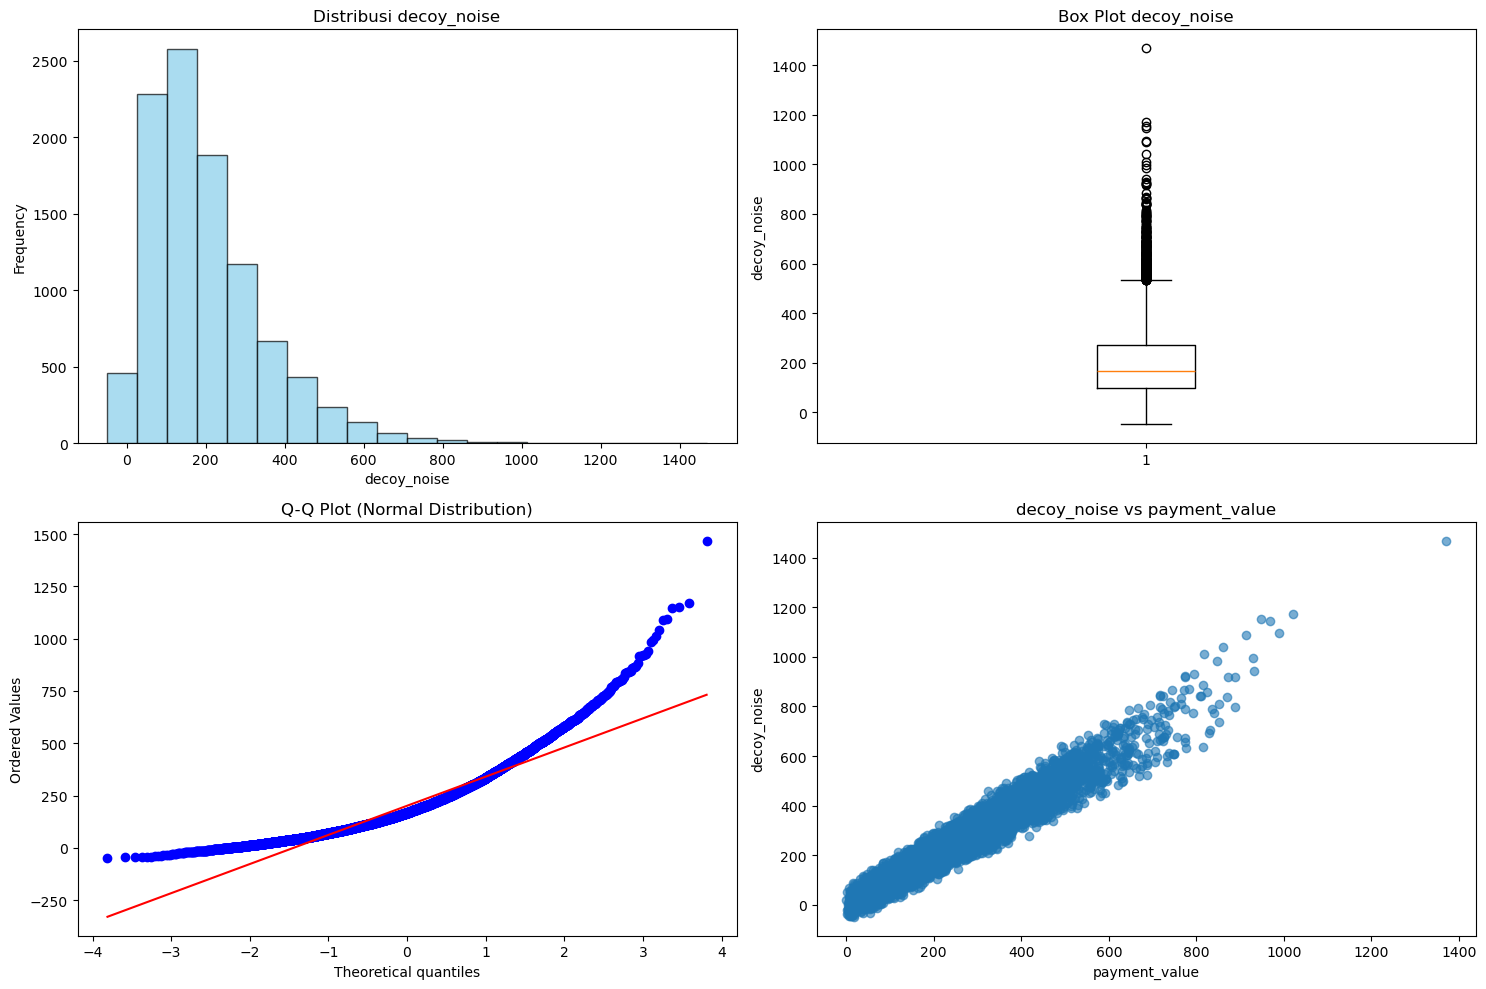

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram
axes[0, 0].hist(
    df["decoy_noise"], bins=20, alpha=0.7, color="skyblue", edgecolor="black"
)
axes[0, 0].set_title("Distribusi decoy_noise")
axes[0, 0].set_xlabel("decoy_noise")
axes[0, 0].set_ylabel("Frequency")

# Box plot
axes[0, 1].boxplot(df["decoy_noise"])
axes[0, 1].set_title("Box Plot decoy_noise")
axes[0, 1].set_ylabel("decoy_noise")

# Q-Q plot untuk normalitas
stats.probplot(df["decoy_noise"], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title("Q-Q Plot (Normal Distribution)")

# Scatter plot dengan payment_value
axes[1, 1].scatter(df["payment_value"], df["decoy_noise"], alpha=0.6)
axes[1, 1].set_xlabel("payment_value")
axes[1, 1].set_ylabel("decoy_noise")
axes[1, 1].set_title("decoy_noise vs payment_value")

plt.tight_layout()
plt.show()

In [15]:
# Detect anomali
# Method 1: Z-Score
def detect_anomalies_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    return z_scores > threshold

# Method 2: IQR (Interquartile Range)
def detect_anomalies_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)


In [16]:
# Terapkan semua metode
df["anomaly_zscore"] = detect_anomalies_zscore(df["decoy_noise"])
df["anomaly_iqr"] = detect_anomalies_iqr(df["decoy_noise"])

# Hitung jumlah anomali untuk setiap metode
print("Jumlah anomali terdeteksi:")
print(f"Z-Score (threshold=3): {df['anomaly_zscore'].sum()}")
print(f"IQR Method: {df['anomaly_iqr'].sum()}")

Jumlah anomali terdeteksi:
Z-Score (threshold=3): 129
IQR Method: 339
